# H2O.ai try out on Petfinder data
## Contents
* [Initiate H2O](#h2o)
* [Data Exploration](#explore)
* [Modeling and Model Tuning](#model)
    * [GBM](#gbm)
    * [Grid Search](#grid)
    * [K-fold CV](#cv)
    * [Random Forest](#rf)
* [AutoML](#automl)
## Summary
This notebook tries H2O exploratory analysis, GBM, RandomForest and other modeling techniques on kaggle's [petfinder competition](https://www.kaggle.com/c/petfinder-adoption-prediction/). The AutoML result **does not outperform** my 'manual' analysis on [github](https://github.com/wanda15tw/2019_petfinder_prediction/blob/master/Pet%20Adoption%20Speed%20Prediction.ipynb), and stacked ensemble was not generated so the metalearner method was not able to be run.  

## Initiate H2O <a class='anchor' id='h2o'></a>

In [1]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

In [2]:
# initiate h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_231"; Java(TM) SE Runtime Environment (build 1.8.0_231-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from /Users/wandajuan/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/yz/qlkpkf315l5dgkrh84xnmk0c0000gn/T/tmpm6llsa0m
  JVM stdout: /var/folders/yz/qlkpkf315l5dgkrh84xnmk0c0000gn/T/tmpm6llsa0m/h2o_wandajuan_started_from_python.out
  JVM stderr: /var/folders/yz/qlkpkf315l5dgkrh84xnmk0c0000gn/T/tmpm6llsa0m/h2o_wandajuan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,19 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_wandajuan_vi7l6p
H2O cluster total nodes:,1
H2O cluster free memory:,910 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [10]:
# data exploration
df = h2o.import_file('df.csv', skipped_columns=[0]) # skip index column

Parse progress: |█████████████████████████████████████████████████████████| 100%


## Data Exploration <a class='anchor' id='explore'></a>

In [11]:
df.describe()

Rows:14993
Cols:98




,Age,Breed_cnt,color_cnt,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,docsentiment-score,word_count,Type_Cat,Breed_American Shorthair,Breed_Beagle,Breed_Bengal,Breed_Calico,Breed_Domestic Long Hair,Breed_Domestic Medium Hair,Breed_Domestic Short Hair,Breed_German Shepherd Dog,Breed_Golden Retriever,Breed_Labrador Retriever,Breed_Mixed Breed,Breed_Oriental Short Hair,Breed_Persian,Breed_Poodle,Breed_Rottweiler,Breed_Shih Tzu,Breed_Siamese,Breed_Spitz,Breed_Tabby,Breed_Terrier,Breed_rare,Gender_Female,Gender_Male,Gender_Mixed,Color1_Black,Color1_Brown,Color1_Cream,Color1_Golden,Color1_Gray,Color1_White,Color1_Yellow,MaturitySize_Extra Large,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,FurLength_Long,FurLength_Medium,FurLength_Short,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes,Dewormed_No,Dewormed_Not Sure,Dewormed_Yes,Sterilized_No,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury,State_Johor,State_Kedah,State_Kelantan,State_Kuala Lumpur,State_Labuan,State_Melaka,State_Negeri Sembilan,State_Pahang,State_Perak,State_Pulau Pinang,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,top entity_adopters,top entity_adoption,top entity_boy,top entity_cat,top entity_dog,top entity_friend,top entity_girl,top entity_home,top entity_mother,top entity_name,top entity_none,top entity_owner,top entity_siblings,dominant_topic_0.0,dominant_topic_1.0,dominant_topic_2.0,dominant_topic_3.0,dominant_topic_4.0,dominant_topic_5.0,dominant_topic_6.0,dominant_topic_7.0,dominant_topic_8.0,dominant_topic_9.0
type,real,int,int,real,real,real,real,enum,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,,-0.9,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,-0.9180229205001548,-0.6376975922096979,-0.005469218968852125,-0.9393611755661415,-0.9858266746704015,-0.9858100446875209,-0.7407190022010273,,0.2809513917739926,-0.8998350914330163,0.457613552991396,0.006269592476489028,0.0060028013072767296,0.004735543253518309,0.007003268191822851,0.01974254652171013,0.08390582271726806,0.2424464750216768,0.006536383645701327,0.01007136663776429,0.013673047422130328,0.3954512105649303,0.0048689388381244585,0.014740212098979523,0.011138531314613486,0.00586940572267058,0.01273927832988728,0.01760821716801174,0.005936103514973655,0.02281064496765157,0.010805042353098112,0.09764556793170145,0.48535983458947507,0.36923897818982193,0.145401187220703,0.4953645034349363,0.2501167211365304,0.05896084839591809,0.0631628093110118,0.04562128993530314,0.04448742746615087,0.0422864003201494,0.0022010271460014674,0.0840392183018742,0.6873207496831855,0.22643900486893884,0.05495898085773361,0.3575668645367838,0.5874741546054826,0.48202494497432136,0.12459147602214367,0.393383579003535,0.321149869939305,0.11878876809177616,0.5600613619689189,0.6721136530380845,0.1210564930300807,0.20682985393183487,0.9656506369639165,0.03208163809777896,0.002267724938304542,0.033815780697658906,0.007336757153338224,0.0010004668845461214,0.2564530114053225,0.0002000933769092243,0.009137597545521244,0.016874541452677916,0.0056693123457613554,0.028013072767291404,0.05622623891149203,0.001467351430667645,0.000867071299939972,0.5812045621289935,0.001734142599879944,0.005602614553458281,0.02387780964450077,0.010671646768491963,0.1205229106916561,0.12799306342960048,0.008203828453278196,0.0158

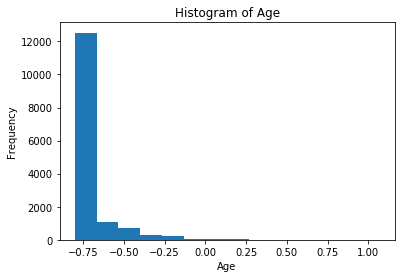

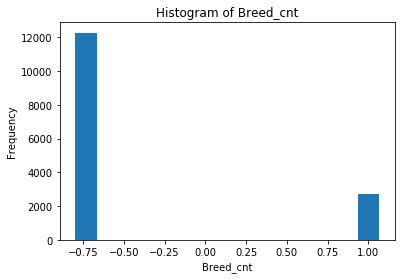

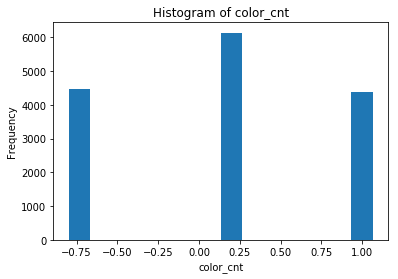

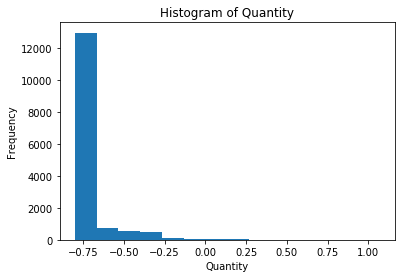

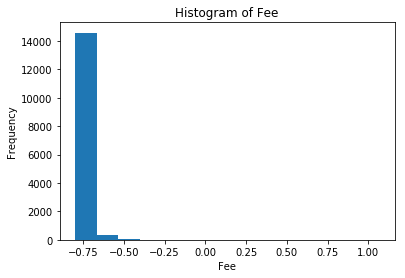

In [13]:
for col in df.columns[:5]:
    df[col].hist()

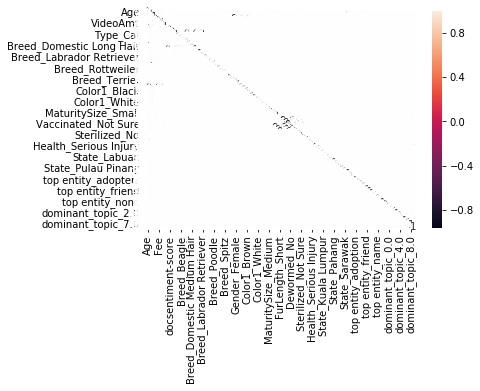

In [15]:
corr = df.cor().as_data_frame()
corr.index = df.columns
sns.heatmap(corr, annot=True)

## Modeling and Model Tuning <a class='anchor' id='model'></a>

In [17]:
# prepare data
train, valid, test = df.split_frame(ratios=[0.8, 0.1], seed=1234)
response = 'AdoptionSpeed'

train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()

print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  12044 1447 1502


### GBM<a class='anchor' id='gbm'></a>

In [18]:
predictors = list(set(df.columns) - {'AdoptionSpeed'})

# GBM
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train) # build model and evaluate on train data

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [19]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1574782936270_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,250.0,91908.0,5.0,5.0,5.0,7.0,32.0,24.524




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4599942454458001
RMSE: 0.6782287559856188
LogLoss: 1.1914048081788098
Mean Per-Class Error: 0.5693010426787668

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,750.0,745.0,800.0,323.0,2.0,0.713740,"1,870 / 2,620"
1,111.0,2448.0,579.0,211.0,1.0,0.269254,"902 / 3,350"
2,202.0,731.0,1861.0,440.0,1.0,0.424730,"1,374 / 3,235"
3,113.0,432.0,833.0,1139.0,0.0,0.547477,"1,378 / 2,517"
4,17.0,72.0,92.0,106.0,35.0,0.891304,287 / 322
5,1193.0,4428.0,4165.0,2219.0,39.0,0.482481,"5,811 / 12,044"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.517519
1,2,0.762039
2,3,0.903188
3,4,0.981568
4,5,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2019-11-26 10:56:11,0.055 sec,0.0,0.800000,1.609438,0.760046
1,,2019-11-26 10:56:13,1.774 sec,1.0,0.790245,1.563480,0.597310
2,,2019-11-26 10:56:14,2.640 sec,2.0,0.781588,1.526510,0.590834
3,,2019-11-26 10:56:14,3.223 sec,3.0,0.773924,1.495949,0.586848
4,,2019-11-26 10:56:15,3.788 sec,4.0,0.767016,1.469970,0.585520
5,,2019-11-26 10:56:19,7.907 sec,16.0,0.718946,1.313060,0.545998
6,,2019-11-26 10:56:23,12.168 sec,27.0,0.699812,1.257267,0.517851
7,,2019-11-26 10:56:27,16.403 sec,38.0,0.688037,1.222141,0.500083
8,,2019-11-26 10:56:31,20.367 sec,50.0,0.678229,1.191405,0.482481



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age,1410.737427,1.000000,0.191562
1,PhotoAmt,760.251404,0.538904,0.103233
2,Breed_Mixed Breed,611.939331,0.433773,0.083094
3,word_count,532.686707,0.377595,0.072333
4,docsentiment-score,361.601776,0.256321,0.049101
5,Quantity,316.178619,0.224123,0.042933
6,Sterilized_No,249.017548,0.176516,0.033814
7,Breed_cnt,188.361023,0.133520,0.025577
8,Fee,170.536362,0.120885,0.023157
9,Type_Cat,158.970154,0.112686,0.021586



See the whole table with table.as_data_frame()



In [22]:
# show metrics on test data
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.5021424167282597
RMSE: 0.7086200792584554
LogLoss: 1.3135542715760624
Mean Per-Class Error: 0.6731825494075938

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,48.0,101.0,117.0,44.0,0.0,0.845161,262 / 310
1,16.0,293.0,74.0,38.0,0.0,0.304038,128 / 421
2,50.0,102.0,172.0,70.0,0.0,0.563452,222 / 394
3,17.0,57.0,119.0,91.0,0.0,0.679577,193 / 284
4,2.0,13.0,7.0,15.0,1.0,0.973684,37 / 38
5,133.0,566.0,489.0,258.0,1.0,0.581894,"842 / 1,447"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.418106
1,2,0.681410
2,3,0.862474
3,4,0.973739
4,5,1.000000


In [28]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 500,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = 'auto', # 'logloss' for classification
    col_sample_rate = 0.7,
    sample_rate_per_class = [0.7]*5,
    seed = 1234
)
# build model based on train data and evaludate on validation data
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [58]:
gbm_tune.model_performance(test).logloss()

1.3362059983782932

### Grid Search<a class='anchor' id='grid'></a>

In [30]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    #ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = 'auto', # 'logloss' for classification
    col_sample_rate = 0.7,
    sample_rate_per_class = [0.7]*5,
    seed = 1234
)

hyper_params = {'max_depth': [4, 6, 8, 10, 12], 'ntrees': [500, 1000, 3000]}
grid = H2OGridSearch(gbm_grid, hyper_params, grid_id='depth_grid',\
                     search_criteria={'strategy': "Cartesian"})

#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_8222c1f06dc241b08eb9a7d710584c79> was cancelled by the user.

In [ ]:
print(grid)

In [ ]:
sorted_grid = grid.get_grid(sort_by='logloss', decreasing=True)
print(sorted_grid)

### K-Fold cross validation <a class='anchor' id='cv'></a>

In [ ]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 500,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = 'auto', # 'logloss' for classification
    col_sample_rate = 0.7,
    sample_rate_per_class = [0.7]*5,
    seed = 1234
)

cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

In [ ]:
cv_gbm.model_performance(valid).logloss()

### RandomForest<a class='anchor' id='rf'></a>

In [60]:
rfc = H2ORandomForestEstimator()
rfc.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [61]:
rfc

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1574782936270_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,250.0,4405423.0,20.0,20.0,20.0,388.0,2123.0,1384.756




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.5140888020513759
RMSE: 0.7169998619604999
LogLoss: 1.4859508908378207
Mean Per-Class Error: 0.6839109682095866

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,583.0,809.0,819.0,407.0,2.0,0.777481,"2,037 / 2,620"
1,278.0,2052.0,646.0,374.0,0.0,0.387463,"1,298 / 3,350"
2,431.0,855.0,1267.0,680.0,2.0,0.608346,"1,968 / 3,235"
3,276.0,529.0,887.0,820.0,5.0,0.674215,"1,697 / 2,517"
4,25.0,90.0,104.0,94.0,9.0,0.972050,313 / 322
5,1593.0,4335.0,3723.0,2375.0,18.0,0.607190,"7,313 / 12,044"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.392810
1,2,0.637579
2,3,0.831202
3,4,0.966622
4,5,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.5065029201710259
RMSE: 0.7116901855238879
LogLoss: 1.3287449923499828
Mean Per-Class Error: 0.6799328797122802

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,55.0,104.0,98.0,53.0,0.0,0.822581,255 / 310
1,32.0,290.0,59.0,40.0,0.0,0.311164,131 / 421
2,62.0,106.0,154.0,72.0,0.0,0.609137,240 / 394
3,23.0,63.0,108.0,90.0,0.0,0.683099,194 / 284
4,2.0,11.0,8.0,16.0,1.0,0.973684,37 / 38
5,174.0,574.0,427.0,271.0,1.0,0.592260,"857 / 1,447"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.407740
1,2,0.661368
2,3,0.861092
3,4,0.973048
4,5,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2019-11-26 13:29:39,0.013 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-26 13:29:40,0.913 sec,1.0,0.790515,14.967932,0.695740,0.791258,15.607934,0.687630
2,,2019-11-26 13:29:41,1.929 sec,2.0,0.780173,13.098928,0.694305,0.746787,8.074340,0.670352
3,,2019-11-26 13:29:42,2.931 sec,3.0,0.768770,11.153306,0.687042,0.735317,5.088323,0.661368
4,,2019-11-26 13:29:43,3.724 sec,4.0,0.759921,9.838254,0.678582,0.726338,3.409049,0.651002
5,,2019-11-26 13:29:47,8.166 sec,10.0,0.733860,4.737239,0.658221,0.717548,1.621442,0.628887
6,,2019-11-26 13:29:52,13.084 sec,18.0,0.725026,2.457329,0.643326,0.715034,1.415685,0.599171
7,,2019-11-26 13:29:56,17.293 sec,25.0,0.720210,1.917763,0.626619,0.714644,1.380683,0.600553
8,,2019-11-26 13:30:01,21.714 sec,32.0,0.718203,1.666264,0.616988,0.713290,1.366481,0.594333
9,,2019-11-26 13:30:05,25.807 sec,39.0,0.717609,1.564978,0.615410,0.711915,1.356214,0.605390



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,docsentiment-score,13112.784180,1.000000,0.072210
1,PhotoAmt,13066.807617,0.996494,0.071956
2,Age,13009.389648,0.992115,0.071640
3,word_count,12752.103516,0.972494,0.070223
4,color_cnt,5512.537109,0.420394,0.030356
5,Quantity,5272.675293,0.402102,0.029036
6,Fee,3857.424805,0.294173,0.021242
7,Sterilized_No,3398.352539,0.259163,0.018714
8,Breed_Mixed Breed,3251.131836,0.247936,0.017903
9,Color1_Black,2959.681641,0.225710,0.016298



See the whole table with table.as_data_frame()


In [62]:
rfc.model_performance(test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.5090408186639038
RMSE: 0.7134709655367231
LogLoss: 1.3626244079059133
Mean Per-Class Error: 0.6665280339426927

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,73.0,107.0,100.0,49.0,0.0,0.778116,256 / 329
1,21.0,294.0,71.0,40.0,0.0,0.309859,132 / 426
2,55.0,104.0,167.0,82.0,0.0,0.590686,241 / 408
3,20.0,74.0,94.0,100.0,1.0,0.653979,189 / 289
4,5.0,23.0,6.0,16.0,0.0,1.000000,50 / 50
5,174.0,602.0,438.0,287.0,1.0,0.577896,"868 / 1,502"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.422104
1,2,0.667111
2,3,0.846205
3,4,0.965379
4,5,1.000000


## AutoML <a class='anchor' id='automl'></a>


In [37]:
# first try, run for 10 mins
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=600, seed=1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [38]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
DRF_1_AutoML_20191126_120444,0.680187,1.4095,0.717207,0.514386
GBM_1_AutoML_20191126_120444,0.682266,1.34741,0.716385,0.513207
XGBoost_1_AutoML_20191126_120224,0.682535,1.37192,0.732724,0.536884
XGBoost_2_AutoML_20191126_120444,0.683754,1.36011,0.727468,0.52921
XGBoost_1_AutoML_20191126_120444,0.684043,1.35609,0.725998,0.527074
GBM_2_AutoML_20191126_120444,0.684811,1.3641,0.726945,0.528449
GBM_3_AutoML_20191126_120444,0.691895,1.42262,0.748502,0.560256
XGBoost_3_AutoML_20191126_120444,0.693866,1.38045,0.737068,0.543269
GBM_4_AutoML_20191126_120444,0.712831,1.54993,0.786334,0.618322
GLM_grid_1_AutoML_20191126_120444_model_1,0.731105,1.40944,0.743285,0.552472


In [41]:
# second try run for 30 mins
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=1800, seed=1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [42]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
GBM_4_AutoML_20191126_121957,0.677072,1.35625,0.711327,0.505986
GBM_2_AutoML_20191126_121957,0.677864,1.34672,0.714897,0.511078
DRF_1_AutoML_20191126_120444,0.680187,1.4095,0.717207,0.514386
DRF_1_AutoML_20191126_121957,0.680497,1.39675,0.717041,0.514148
GBM_1_AutoML_20191126_120444,0.682266,1.34741,0.716385,0.513207
GBM_1_AutoML_20191126_121957,0.682266,1.34741,0.716385,0.513207
XGBoost_1_AutoML_20191126_120224,0.682535,1.37192,0.732724,0.536884
XGBoost_2_AutoML_20191126_120444,0.683754,1.36011,0.727468,0.52921
XGBoost_2_AutoML_20191126_121957,0.683754,1.36011,0.727468,0.52921
GBM_3_AutoML_20191126_121957,0.684036,1.35119,0.715644,0.512146


In [44]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20191126_121957


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,39.0,195.0,385388.0,10.0,10.0,10.0,43.0,295.0,152.01538




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3234616701272844
RMSE: 0.5687369076535164
LogLoss: 0.860927882894187
Mean Per-Class Error: 0.30208423062995016

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,1680.0,362.0,404.0,173.0,1.0,0.358779,"940 / 2,620"
1,48.0,2921.0,271.0,110.0,0.0,0.128060,"429 / 3,350"
2,109.0,358.0,2589.0,179.0,0.0,0.199691,"646 / 3,235"
3,67.0,208.0,337.0,1905.0,0.0,0.243147,"612 / 2,517"
4,18.0,38.0,84.0,47.0,135.0,0.580745,187 / 322
5,1922.0,3887.0,3685.0,2414.0,136.0,0.233643,"2,814 / 12,044"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.766357
1,2,0.924776
2,3,0.975257
3,4,0.993690
4,5,1.000000



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.492255285908491
RMSE: 0.7016090691464093
LogLoss: 1.3091978871100185
Mean Per-Class Error: 0.651868833505133

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,66.0,97.0,93.0,54.0,0.0,0.787097,244 / 310
1,36.0,280.0,66.0,39.0,0.0,0.334917,141 / 421
2,57.0,93.0,161.0,82.0,1.0,0.591371,233 / 394
3,24.0,49.0,97.0,114.0,0.0,0.598592,170 / 284
4,4.0,11.0,7.0,14.0,2.0,0.947368,36 / 38
5,187.0,530.0,424.0,303.0,3.0,0.569454,"824 / 1,447"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.430546
1,2,0.686247
2,3,0.871458
3,4,0.973739
4,5,1.000000



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.5059862217097336
RMSE: 0.7113270848981738
LogLoss: 1.3562464940888328
Mean Per-Class Error: 0.6770720155687949

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,2 - 3 Month,No Adoption,One Month,One Week,Same Day,Error,Rate
0,570.0,775.0,858.0,416.0,1.0,0.782443,"2,050 / 2,620"
1,290.0,2111.0,619.0,329.0,1.0,0.369851,"1,239 / 3,350"
2,449.0,797.0,1309.0,679.0,1.0,0.595363,"1,926 / 3,235"
3,254.0,480.0,914.0,865.0,4.0,0.656337,"1,652 / 2,517"
4,31.0,81.0,90.0,114.0,6.0,0.981366,316 / 322
5,1594.0,4244.0,3790.0,2403.0,13.0,0.596397,"7,183 / 12,044"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.403603
1,2,0.656260
2,3,0.850714
3,4,0.972766
4,5,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.4036038,0.0042278403,0.40307182,0.40016603,0.40805313,0.3989207,0.40780732
1,err,0.5963962,0.0042278403,0.5969282,0.59983397,0.59194684,0.6010793,0.5921927
2,err_count,1436.6,10.334409,1438.0,1445.0,1426.0,1448.0,1426.0
3,logloss,1.356247,0.007758582,1.3623013,1.3586028,1.3434818,1.354809,1.3620399
4,max_per_class_error,0.98122627,0.012507027,0.984127,0.9818182,1.0,0.9672131,0.972973
5,mean_per_class_accuracy,0.32309955,0.0029647413,0.32178298,0.3221777,0.3227785,0.32055852,0.3282001
6,mean_per_class_error,0.67690045,0.0029647413,0.67821705,0.6778223,0.6772215,0.67944145,0.6717999
7,mse,0.50598586,0.0031777853,0.5086013,0.5045902,0.5063306,0.5090934,0.5013136
8,r2,0.59854513,0.0033372056,0.59660715,0.60237706,0.5975744,0.59456646,0.60160065
9,rmse,0.711324,0.002235272,0.7131629,0.71034515,0.71156913,0.7135078,0.70803505



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2019-11-26 12:33:30,1 min 34.506 sec,0.0,0.800000,1.609438,0.760046,0.800000,1.609438,0.758811
1,,2019-11-26 12:33:33,1 min 36.677 sec,5.0,0.733697,1.340792,0.422368,0.759490,1.447224,0.599171
2,,2019-11-26 12:33:35,1 min 38.763 sec,10.0,0.688256,1.193620,0.380272,0.736130,1.376565,0.590878
3,,2019-11-26 12:33:37,1 min 40.781 sec,15.0,0.654863,1.094748,0.343657,0.721745,1.340487,0.572909
4,,2019-11-26 12:33:41,1 min 45.321 sec,20.0,0.630493,1.026514,0.316174,0.713860,1.323906,0.575674
5,,2019-11-26 12:33:43,1 min 47.668 sec,25.0,0.612083,0.976567,0.292926,0.708632,1.315017,0.567381
6,,2019-11-26 12:33:46,1 min 50.068 sec,30.0,0.594796,0.929958,0.271089,0.705294,1.311514,0.570145
7,,2019-11-26 12:33:48,1 min 52.405 sec,35.0,0.579298,0.888445,0.250083,0.702261,1.307933,0.568072
8,,2019-11-26 12:33:50,1 min 54.251 sec,39.0,0.568737,0.860928,0.233643,0.701609,1.309198,0.569454



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age,2047.880981,1.000000,0.131005
1,word_count,1634.695557,0.798238,0.104573
2,PhotoAmt,1348.008545,0.658246,0.086234
3,docsentiment-score,983.898071,0.480447,0.062941
4,Quantity,444.518890,0.217063,0.028436
5,color_cnt,430.216614,0.210079,0.027521
6,Breed_Mixed Breed,388.385834,0.189653,0.024846
7,Fee,341.591858,0.166803,0.021852
8,State_Selangor,313.709167,0.153187,0.020068
9,Color1_Black,303.331757,0.148120,0.019405



See the whole table with table.as_data_frame()


In [47]:
valid.shape

(1447, 98)

In [48]:
pred = aml.leader.predict(valid)
pred

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,2 - 3 Month,No Adoption,One Month,One Week,Same Day
No Adoption,0.136318,0.487662,0.204667,0.153074,0.0182794
No Adoption,0.314111,0.45787,0.183593,0.0330694,0.0113567
2 - 3 Month,0.368226,0.36077,0.210474,0.0458669,0.0146642
No Adoption,0.209333,0.452016,0.204869,0.109277,0.0245054
2 - 3 Month,0.351343,0.131518,0.266684,0.230054,0.0204011
One Month,0.241801,0.174095,0.427826,0.128271,0.0280069
One Week,0.265088,0.0321795,0.252853,0.429513,0.0203669
2 - 3 Month,0.349839,0.183447,0.254881,0.195775,0.0160587
One Month,0.215558,0.149941,0.316634,0.300794,0.0170723
One Week,0.246793,0.0860762,0.235391,0.406246,0.0254931


In [51]:
y_pred = pred.as_data_frame()['predict']

In [56]:
valid_df = valid.as_data_frame()
target = 'AdoptionSpeed'
predictors = list(valid_df.columns)
predictors.remove(target)
y_valid = valid_df[target]
X_valid = valid_df[predictors]

X_valid.shape, y_valid.shape

((1447, 97), (1447,))

In [57]:
from sklearn.metrics import cohen_kappa_score

def get_score(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

get_score(y_valid, y_pred)

0.2543015738434635

### Get Model

In [88]:
# get all models' ids from the AutoML leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:, 0])

# get the "All Models" Stacked Ensemble model
try:
    se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
except:
    print('No stacked ensemble model found')
    se = None

No stacked ensemble model found


In [89]:
se

In [43]:
#matalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.std_coef_plot()

AttributeError: type object 'H2OGradientBoostingEstimator' has no attribute 'metalearner'